# A. Problem Definition

1. **Moore's Law**
  - The number of transistors per square inch on integrated circuits doubles approximately every 2 years.
  - As a result, Computing power grows exponentially.

2. **The generic equation for exponential grow:**
  - $C = C_{0} r^{t}$
  - $C$ is the output (e.g., number of transistors)
  - $C_{0}$ is the initial value when $(t = 0)$
  - $t$ is the input variable (e.g., time in years)
  - $r$ is the rate of growth
  - If $t$ increases by 1, then $C$ increases by a factor of $r$

3. **Make Moore's Law linear:**
  - $C = C_{0} r^{t}$
  - $ln(C) = t * ln(r) + ln(C_{0})$
  - $ln(C)$ is a linear equation of time
  - As a result, Linear Regression on the log of transistor counts (given: $log(C)$) w.r.t. time in order to find the rate at which transistor counts double (required: $t$).
  - $ln(C) = t * ln(r) + ln(C_{0})$
  - $y = ax + b$
  - Where $y = ln(C)$, $a = ln(r)$, $x = t$, and $b = ln(C_{0})$

4. **All data is the same**
  - As long as data comes from a file (e.g., Excel spreadsheet, or CSV), the code will be changed.

|Year  |Transistor Count|
|:---  |:---            |
|1971  |2300            |
|1972  |3500            |
|1973  |2500            |
|1974  |8000            |
|...   |...             |

5. **Data Normalization**
  - It is preferable to normalize the data, so that they lie in a small range of values.
  - For example, converting the sample to mean = 0 and variance = 1 (also called Standardization or batch normalization).
  - Normalization is a more general term (e.g., could mean "min 0 max 1")
  - $z = \frac{x - mean}{STD} = \frac{x - \mu}{\sigma} $







# B. PyTorch Steps
1. Import the necessary libraries.
2. Get the data (moore.csv).
3. Load the data.
4. Reshape the input data (N x D) and the output data (N x K).
5. Plot the data.
6. Take the Natural logarithm (ln) for the output to make it suitable for a linear model.
7. Normalize (standardize) the data.
8. Cast NumPy arrays to Float32.
9. Convert NumPy arrays to PyTorch tensors.
10. Create (construct) a linear regression model.
11. Specify the Loss and Optimizer.
12. Fit the model.
13. Plot loss per iteration.
14. Plot the graph (points with the fitted line).
15. Display the weight (slope) and the bias (y-intercept) of the trained model.
16. Calculate the slope after transforming back to the original scale.
17. Calculate the time to double the transistors count (in years).

In [63]:
# 1. Import the necessary libraries.

import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [64]:
# 2. Get the data (moore.csv).

uploaded = files.upload()

Saving moore.csv to moore (3).csv


In [65]:
# 3. Load the data.

data = pd.read_csv('moore.csv', header = None).values

In [66]:
# 4. Reshape the input data (N x D) and the output data (N x K).

D, K = 1,1

X = data[:, 0].reshape(-1, D)
Y = data[:, 1].reshape(-1, K)

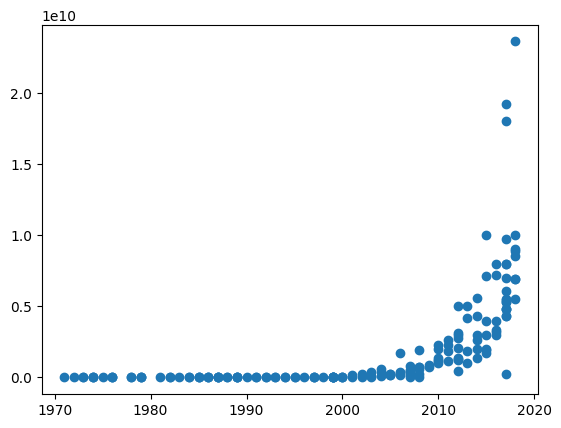

In [67]:
# 5. Plot the data.

plt.scatter(X, Y);

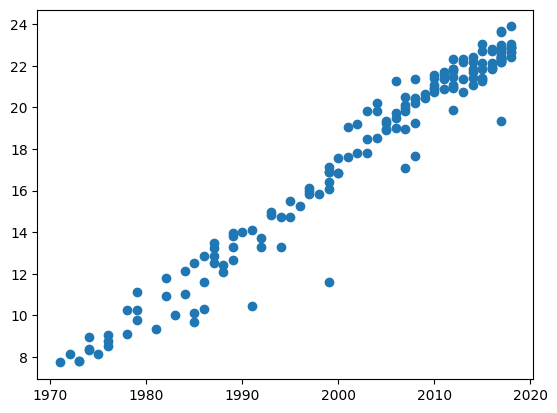

In [68]:
# 6. Take the Natural logarithm (ln) for the output to make it suitable for a linear model.

Y = np.log(Y) # ln() in NumPy is written as: numpy.log() 
plt.scatter(X, Y);

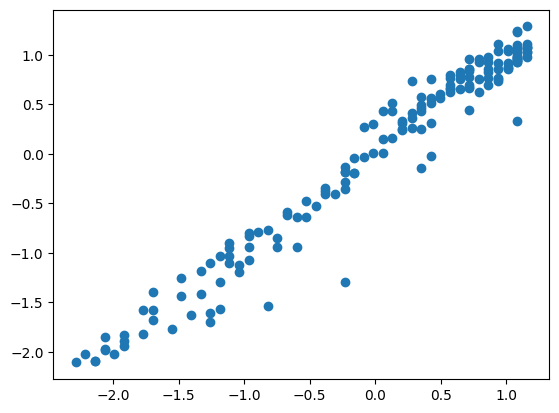

In [69]:
# 7. Normalize (standardize) the data.

def normalize_data(data):
  mean = np.mean(data)
  std = np.std(data)
  return (data - mean) / std 

X_normalized = normalize_data(X)
Y_normalized = normalize_data(Y)

plt.scatter(X_normalized, Y_normalized);

In [70]:
# 8. Cast NumPy arrays to Float32.

X_normalized = X_normalized.astype(np.float32)
Y_normalized = Y_normalized.astype(np.float32)

In [71]:
# 9. Convert NumPy arrays to PyTorch tensors.

inputs = torch.from_numpy(X_normalized)
targets = torch.from_numpy(Y_normalized)

print(type(inputs))
print(type(targets))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [72]:
# 10. Create (construct) a linear regression model.

model = nn.Linear(D, K)

In [73]:
# 11. Specify the Loss and Optimizer.

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.7)

In [74]:
# 12. Fit the model.

epochs = 100
losses = []

for epoch in range(epochs):
  # zero the parameter gradients (avoid accumulation)
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # Record the loss
  losses.append(loss.item())

  # Backward and optimize
  loss.backward()
  optimizer.step()

  print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}')

Epoch 1/100, Loss: 0.2825
Epoch 2/100, Loss: 0.2729
Epoch 3/100, Loss: 0.2571
Epoch 4/100, Loss: 0.2379
Epoch 5/100, Loss: 0.2174
Epoch 6/100, Loss: 0.1969
Epoch 7/100, Loss: 0.1773
Epoch 8/100, Loss: 0.1591
Epoch 9/100, Loss: 0.1426
Epoch 10/100, Loss: 0.1278
Epoch 11/100, Loss: 0.1149
Epoch 12/100, Loss: 0.1035
Epoch 13/100, Loss: 0.0937
Epoch 14/100, Loss: 0.0853
Epoch 15/100, Loss: 0.0780
Epoch 16/100, Loss: 0.0719
Epoch 17/100, Loss: 0.0666
Epoch 18/100, Loss: 0.0622
Epoch 19/100, Loss: 0.0584
Epoch 20/100, Loss: 0.0552
Epoch 21/100, Loss: 0.0525
Epoch 22/100, Loss: 0.0503
Epoch 23/100, Loss: 0.0484
Epoch 24/100, Loss: 0.0468
Epoch 25/100, Loss: 0.0454
Epoch 26/100, Loss: 0.0443
Epoch 27/100, Loss: 0.0434
Epoch 28/100, Loss: 0.0426
Epoch 29/100, Loss: 0.0419
Epoch 30/100, Loss: 0.0413
Epoch 31/100, Loss: 0.0409
Epoch 32/100, Loss: 0.0405
Epoch 33/100, Loss: 0.0402
Epoch 34/100, Loss: 0.0399
Epoch 35/100, Loss: 0.0397
Epoch 36/100, Loss: 0.0395
Epoch 37/100, Loss: 0.0393
Epoch 38/1

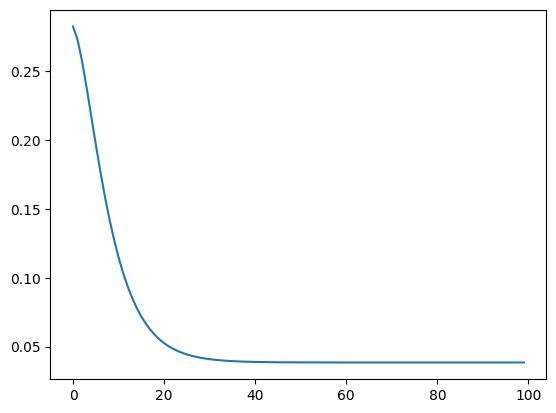

In [75]:
# 13. Plot loss per iteration.

plt.plot(losses);

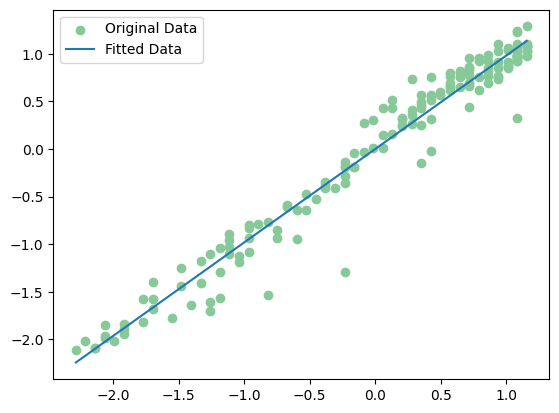

In [76]:
# 14. Plot the graph (points with the fitted line).

predicted = model(inputs).detach().numpy()

plt.scatter(X_normalized, Y_normalized, color = '#88c999', label = 'Original Data')
#plt.plot(X, Y, 'ro', label = 'Original Data')
plt.plot(X_normalized, predicted, label = 'Fitted Data')
plt.legend()
plt.show()

In [77]:
# 15. Display the weight (slope) and the bias (y-intercept) of the trained model.

w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.9805385]] [9.088547e-05]


## Transforming back to the original scale

1. The growth is exponential and has the form:
  * $C = C_{0} r^{t}$
  * Where $C$ is the transistor count, $t$ is the time in years, $C_{0}$ is the original tansistor count at year 0, and $r$ is the rate of growth.

2. Taking the log of both sides to make the equation linear:
  * $ln(C) = t * ln(r) + ln(C_{0})$
  * $y' = w x' + b$
  * $Input = y' = ln(C)$
  * $Output = x' = t$
  * $Slope = w = ln(r)$
  * $Y-intercept = b = ln(C_{0})$

3. The data is normalized:
  * $y' = \frac{y - m_{y}}{s_{y}}$
  * $x' = \frac{x - m_{x}}{s_{x}}$
  * $y' = w x' + b$
  * Where $m_{x}$ represents the mean of $x$ data, and $s_{x}$ represents the Standard Deviation of $x$ data. The same is for $y$ data.
  * $\frac{y - m_{y}}{s_{y}} = w \frac{x - m_{x}}{s_{x}} + b$
  * $y = w \frac{s_{y}}{s_{x}} x - w \frac{s_{y}}{s_{x}} m_{x} + b s_{y} + m_{y}$
  * $Slope = w \frac{s_{y}}{s_{x}}$


In [78]:
# 16. Calculate the slope after transforming back to the original scale.

std_x = np.std(X)
std_y = np.std(Y)

slope = w[0, 0] * std_y / std_x
print(slope)

0.34167111541355244


## Exponential Growth Model

* To get the value of $r$:
  * $C = C_{0} r^{t}$
  * $ln(C) = ln(r) * t + ln(C_{0})$
  * output = slope * input + y intercept
  * $y = m x + b$
  * $y = ln(C)$
  * $m = ln(r) = 0.3416205627202567$
  * $x = t$
  * $r = e^{0.3416205627202567} = 1.4072262421029569$

* To find the time it takes for transistor count to double, it is necessary to find the amount of time it takes for $C$ to be $2C$.

  * Let the original starting time $t$ corresponds with the initial transistor count $C = C_{0} r^{t}$

  * Let the original starting time $t'$ corresponds with the initial transistor count $2C = C_{0} r^{t'}$

  * $\frac{2*C}{C} = \frac{C_{0} r^{t'}}{C_{0} r^{t}}$
  * $2 = r^{t' - t}$
  * $t' - t = \frac{ln(2)}{ln(r)} = \frac{ln(2)}{slope} $




In [79]:
# 17. Calculate the time to double the transistors count (in years).

print(f'Time to double the transistors count (in years) = {np.log(2)/slope}')

Time to double the transistors count (in years) = 2.028697040196016
